In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dff = pd.read_csv("Female Vignette.csv")
dfm = pd.read_csv("Male Vignette.csv")

## Data Cleaning, concatenate two sheets, change column names, reverse scales, quantifying

In [2]:
dff.rename(columns=lambda x: x.strip())
dfm.rename(columns=lambda x: x.strip())
dff.drop(columns="Timestamp",inplace=True)
dfm.drop(columns="Timestamp",inplace=True)

dff["Gendered language (f=0,m=1)"] = 0
dfm["Gendered language (f=0,m=1)"] = 1

df = pd.concat([dff,dfm])
df.reset_index(inplace=True, drop=True)
df.columns = [num for num,i in enumerate(df.columns)]

In [3]:
#Reverse code scales
def reverseScoring(df, high, cols):
    '''Reverse scores on given columns
     df = your data frame,
     high = highest score available
     cols = the columns you want reversed in list form'''
    df[cols] = high - df[cols]
    return df

In [4]:
#Gender Role attitudes
df = reverseScoring(df, 6, [19,20])

In [5]:
#Gender of participant
df[26] = df[26].apply(lambda x: 1 if x == "Male" else 0)

In [6]:
#Have you owned a business before?
df[31] = df[31].apply(lambda x: 1 if x == "Yes" else 0)

In [7]:
#Filter partipants with manipulation check question #7

In [8]:
df = df[df[7] == 4]

## Summarise scales

In [9]:
df["cog_leg"] = (df[0]+df[1]+df[2])/3
df["prag_leg"] = (df[3]+df[4]+df[5])/3
df["gender_role_att"] = (df[16]+df[17]+df[18]+df[19]+df[20])/5

## Write questions code to desktop

In [10]:
#Write question code to Desktop
columns_index = [str(num) + " " + i + " \n" for num,i in enumerate(dff.columns)]
textfile = open("C:/Users/truon/Desktop/question_codes.txt", "w")
for element in columns_index:
    textfile.write(element + "\n")
textfile.close()

In [11]:
f = open("C:/Users/truon/Desktop/question_codes.txt", "r")
print(f.read())

0 I envision the business receiving high-profile endorsements in the future. 

1 I envision this business receiving favourable press coverage in the future. 

2 I envision this business having a top management team that will benefit the organisation. 

3 In general, this company will create value for its stakeholders.  

4 The policies of this company will cater to the interests of its stakeholders.  

5 I believe the activities of this company will benefit their immediate stakeholders 

6 I had no difficulty imagining myself in the scenario (as a funder) presented earlier. 

7 This question serves as an indicator for whether you actually take your time and carefully read the instructions. Please select the second from right option (4). 

8 When jobs are scarce, men should have more of a right to a job than women.  

9 If a woman earns more money than her husband, it's almost certain to cause problems. 

10 Women have the same rights as men. 

11 On the whole, men make better political

# Analysis
## Visuals

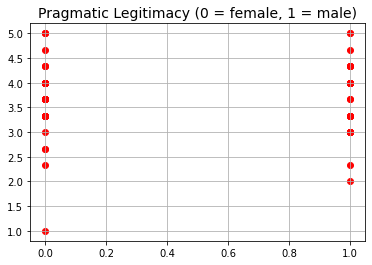

In [12]:
plt.scatter(df[34], df['prag_leg'], color='red')
plt.title('Pragmatic Legitimacy (0 = female, 1 = male)', fontsize=14)
# plt.xlabel('Interest Rate', fontsize=14)
# plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

## Cronbach's Alpha

In [13]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [14]:
print("Cronbach's Alpha for Cognitive Legitimacy is: " + str(cronbach_alpha(df[[0,1,2]])))
print("Cronbach's Alpha for Pragmatic Legitimacy is: " + str(cronbach_alpha(df[[3,4,5]])))
print("Cronbach's Alpha for Gender Role Attitude is: " + str(cronbach_alpha(df[[16,17,18,19,20]])))

Cronbach's Alpha for Cognitive Legitimacy is: 0.7193567834078763
Cronbach's Alpha for Pragmatic Legitimacy is: 0.7183524874255046
Cronbach's Alpha for Gender Role Attitude is: 0.6510644948231828


## Multiple Linear Regression

In [15]:
from sklearn import linear_model
import statsmodels.api as sm

In [19]:
#Define predictors
X = df[[34,"gender_role_att",26,31]]

Y = df["cog_leg"]
regression = linear_model.LinearRegression()
regression.fit(X,Y)
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print("Regression for Cognitive Legitimacy \n\nModel includes 26 = Gender of participant, 31 = Business owner, 34 = Gender identity of vignette \n\n" + str(print_model)  + "\n")

Regression for Cognitive Legitimacy 

Model includes 26 = Gender of participant, 31 = Business owner, 34 = Gender identity of vignette 

                            OLS Regression Results                            
Dep. Variable:                cog_leg   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     3.885
Date:                Tue, 16 Nov 2021   Prob (F-statistic):            0.00619
Time:                        10:39:58   Log-Likelihood:                -85.911
No. Observations:                  85   AIC:                             181.8
Df Residuals:                      80   BIC:                             194.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025  

In [17]:
# #Define predictors
# X = df[[34,"gender_role_att",26]]

# Y = df["prag_leg"]
# regression = linear_model.LinearRegression()
# regression.fit(X,Y)
# X = sm.add_constant(X) # adding a constant
# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 
# print_model = model.summary()
# print("Regression for Cognitive Legitimacy \n\n" + str(print_model)  + "\n")